In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('P39-Financial-Data.csv')

In [3]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
dataset.shape

(17908, 21)

In [5]:
dataset.columns.values

array(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype=object)

In [6]:
#dataset.describe

In [7]:
dataset.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

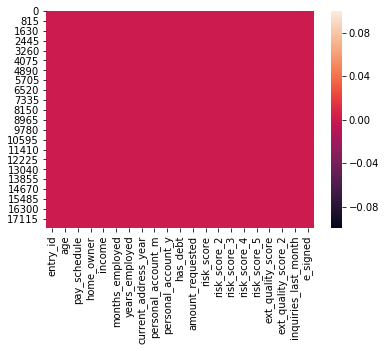

In [8]:
sns.heatmap(dataset.isna())

In [9]:
## no particular field has na values

In [10]:
dataset2=dataset.drop(columns=['entry_id','pay_schedule','e_signed'])

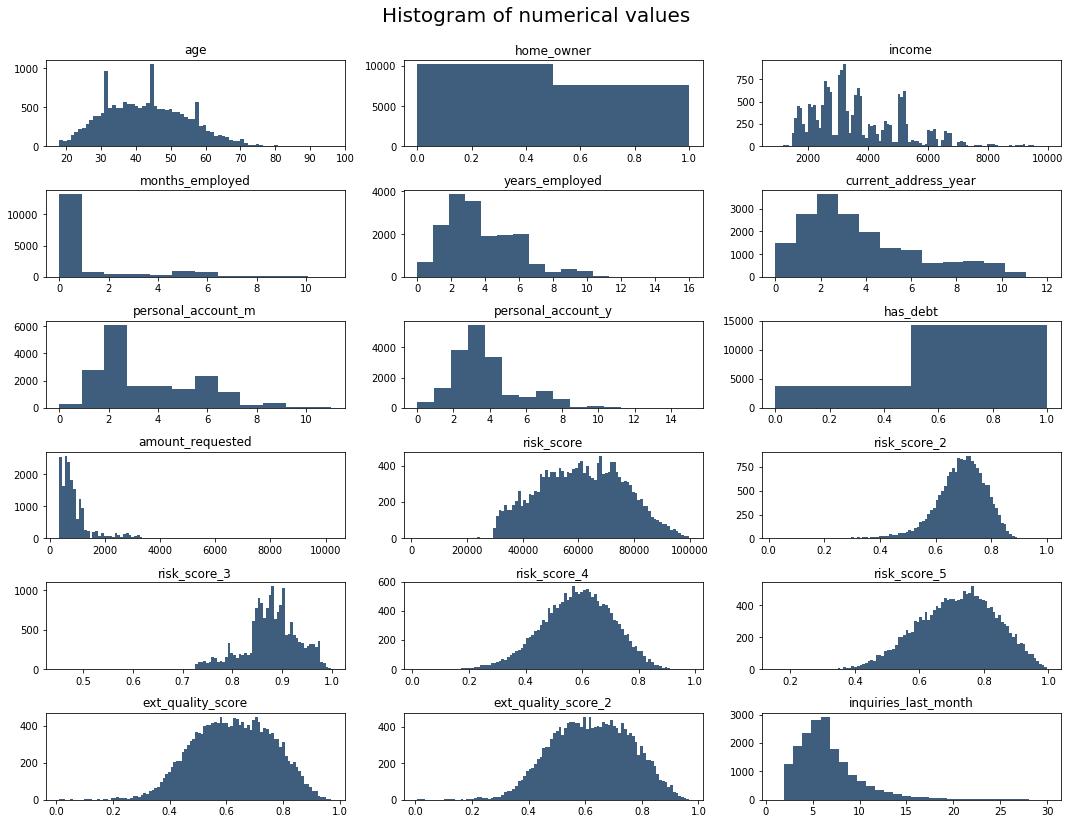

In [11]:
fig=plt.figure(figsize=(15,12))
plt.suptitle("Histogram of numerical values",fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6,3,i+1)
    f=plt.gca()
    f.set_title(dataset2.columns.values[i])
    vals=np.size(dataset2.iloc[:,i].unique())
    if vals>100:
        vals=100
    plt.hist(dataset2.iloc[:,i],bins=vals,color='#3F5D7D')
plt.tight_layout(rect=[0,0.03,1,0.95])

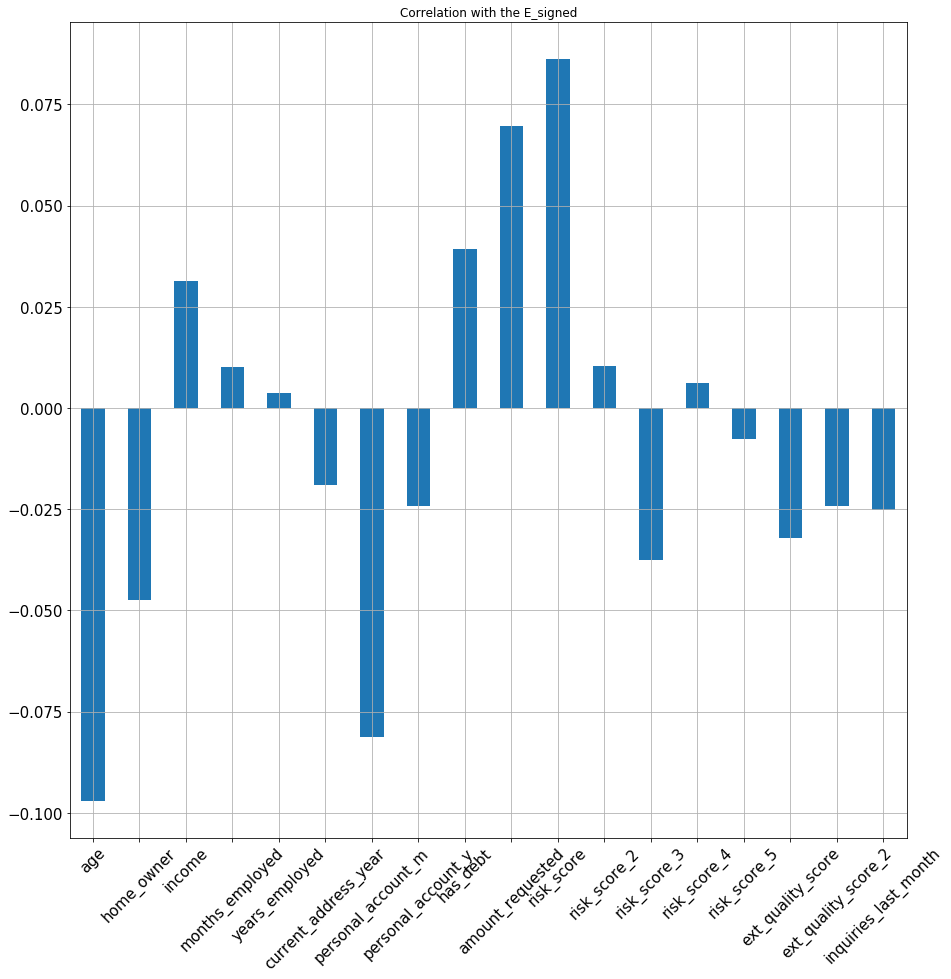

In [12]:
## Correaltion Plot
dataset2.corrwith(dataset.e_signed).plot.bar(figsize=(15,15),rot=45,title="Correlation with the E_signed",fontsize=15,grid=True)

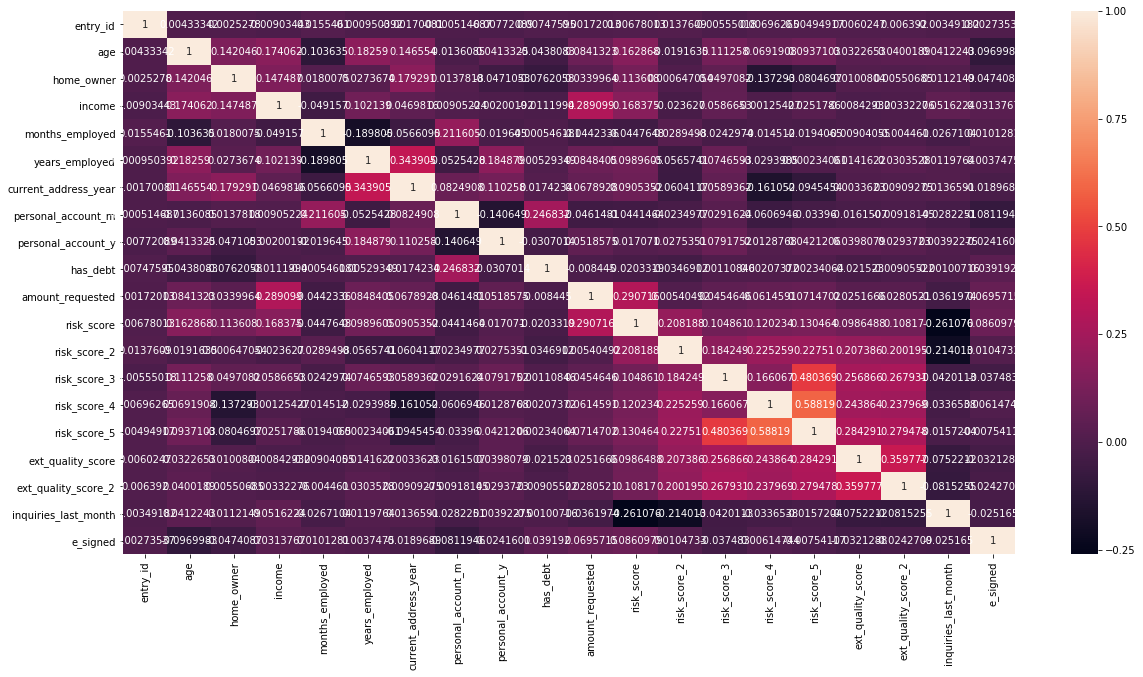

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),annot=True,fmt='g')

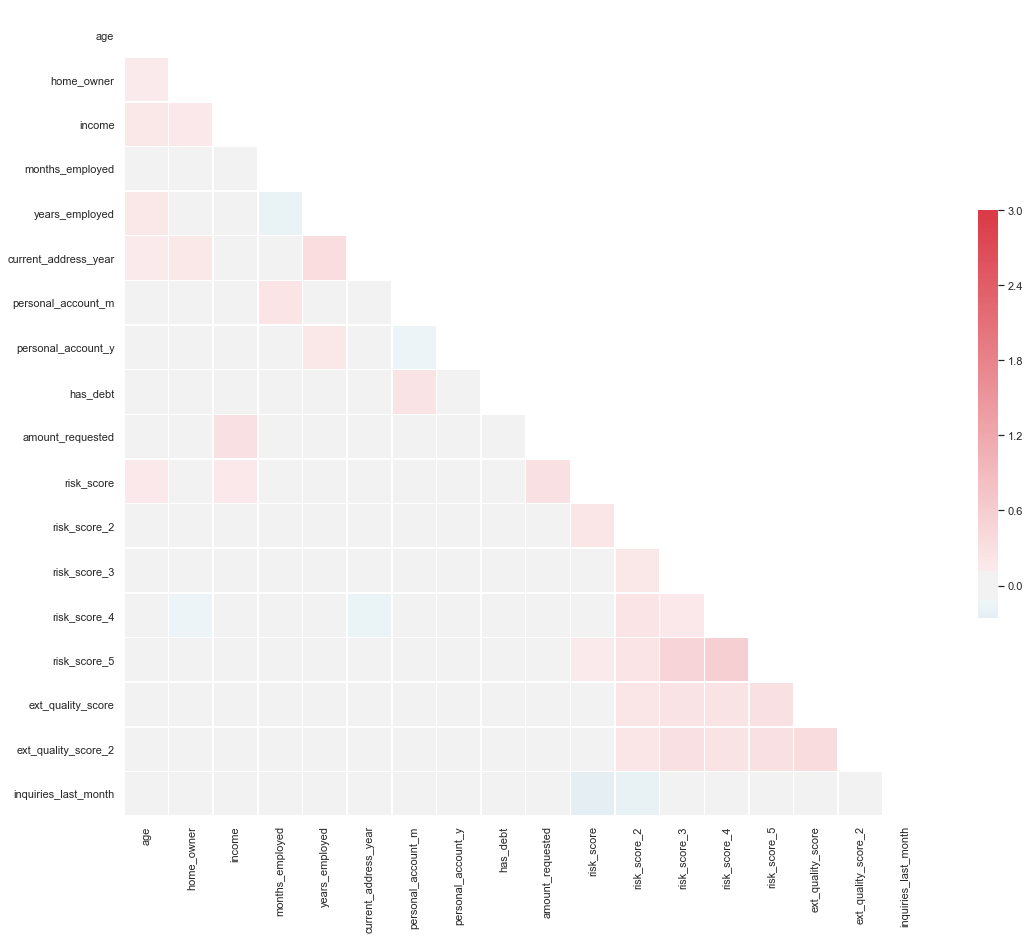

In [14]:
##Correlational Matrix
sns.set(style="white")

corr=dataset.drop(columns=['entry_id','e_signed']).corr()

mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f,ax=plt.subplots(figsize=(18,15))

cmap=sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=3,center=0,square=True,linewidths=0.5,cbar_kws={"shrink":.5})

In [15]:
import random
import time

In [16]:
## Feature Engineering
dataset=dataset.drop(columns=['months_employed'])

In [17]:
dataset['personal_acc_months']=(dataset.personal_account_m+(dataset.personal_account_y*12))

In [18]:
dataset[['personal_account_y','personal_account_m','personal_acc_months']].head()

,personal_account_y,personal_account_m,personal_acc_months
0,2,6,30
1,7,2,86
2,1,7,19
3,7,2,86
4,8,2,98


In [19]:
dataset=dataset.drop(columns=['personal_account_y','personal_account_m'])

In [20]:
#One hot Encoding
dataset=pd.get_dummies(dataset)

In [21]:
dataset.columns.values

array(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested',
       'risk_score', 'risk_score_2', 'risk_score_3', 'risk_score_4',
       'risk_score_5', 'ext_quality_score', 'ext_quality_score_2',
       'inquiries_last_month', 'e_signed', 'personal_acc_months',
       'pay_schedule_bi-weekly', 'pay_schedule_monthly',
       'pay_schedule_semi-monthly', 'pay_schedule_weekly'], dtype=object)

In [22]:
dataset=dataset.drop(columns=['pay_schedule_semi-monthly'])

In [23]:
## Removing Extra Columns

In [24]:
response=dataset['e_signed']

In [25]:
dataset=dataset.drop(columns=['e_signed'])

In [26]:
user=dataset['entry_id']
dataset=dataset.drop(columns=['entry_id'])

In [27]:
## Train test Split
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size=0.2, random_state=0)

In [29]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train2=pd.DataFrame(sc_X.fit_transform(X_train))
X_test2=pd.DataFrame(sc_X.transform(X_test))
X_train2.columns=X_train.columns.values
X_test2.columns=X_test.columns.values
X_train2.index=X_train.index.values
X_test2.index=X_test.index.values
X_train=X_train2
X_test=X_test2

C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\alokt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


## Model Building

Logistic Regression Model

In [30]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0,penalty='l1')

In [31]:
classifier.fit(X_train,y_train)

C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
## Model Predictions
y_pred=classifier.predict(X_test)

In [33]:
## Model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

In [34]:
cm=confusion_matrix(y_test,y_pred)

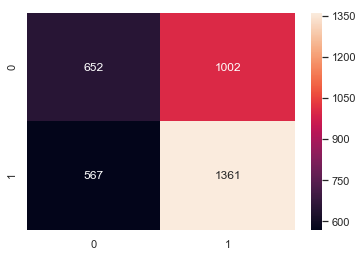

In [35]:
sns.heatmap(cm,annot=True,fmt='g')

In [36]:
acc=accuracy_score(y_test,y_pred)

In [37]:
rec=recall_score(y_test,y_pred)

In [38]:
pre=precision_score(y_test,y_pred)

In [39]:
f1=f1_score(y_test,y_pred)

In [40]:
results=pd.DataFrame([['Linear Regression Model(Lass0)',acc,rec,pre,f1]],
            columns=['MOdel','Accuracy_Score','Recall_Score','Precision_Score','F1_Score'])
results

,MOdel,Accuracy_Score,Recall_Score,Precision_Score,F1_Score
0,Linear Regression Model(Lass0),0.561977,0.705913,0.575963,0.634351


Support Vector Machine

In [41]:
from sklearn.svm import SVC

In [42]:
classifier=SVC(random_state=0,kernel='linear')

In [43]:
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [44]:
## Model Predictions
y_pred=classifier.predict(X_test)
## Accuracy
acc=accuracy_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
r1=pd.DataFrame([['SVM (linear)',acc,rec,pre,f1]],
            columns=['MOdel','Accuracy_Score','Recall_Score','Precision_Score','F1_Score'])
r1

,MOdel,Accuracy_Score,Recall_Score,Precision_Score,F1_Score
0,SVM (linear),0.568398,0.735996,0.577769,0.647354


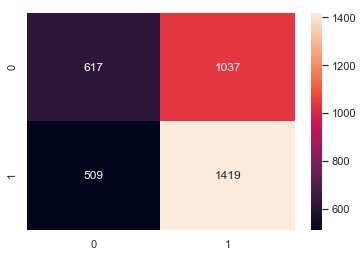

In [45]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g')

In [46]:
results=results.append(r1,ignore_index=True)

In [47]:
results

,MOdel,Accuracy_Score,Recall_Score,Precision_Score,F1_Score
0,Linear Regression Model(Lass0),0.561977,0.705913,0.575963,0.634351
1,SVM (linear),0.568398,0.735996,0.577769,0.647354


SVM with rbf kernel

In [48]:
from sklearn.svm import SVC
classifier=SVC(random_state=0,kernel='rbf')
classifier.fit(X_train,y_train)
## Model Predictions
y_pred=classifier.predict(X_test)
## Accuracy
acc=accuracy_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
r2=pd.DataFrame([['SVM (rbf)',acc,rec,pre,f1]],
            columns=['MOdel','Accuracy_Score','Recall_Score','Precision_Score','F1_Score'])
r2

,MOdel,Accuracy_Score,Recall_Score,Precision_Score,F1_Score
0,SVM (rbf),0.591569,0.690871,0.60573,0.645505


In [49]:
results=results.append(r2,ignore_index=True)
results

,MOdel,Accuracy_Score,Recall_Score,Precision_Score,F1_Score
0,Linear Regression Model(Lass0),0.561977,0.705913,0.575963,0.634351
1,SVM (linear),0.568398,0.735996,0.577769,0.647354
2,SVM (rbf),0.591569,0.690871,0.605730,0.645505


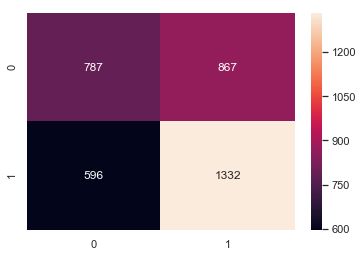

In [50]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g')

Random Forest Model

In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(random_state=0,n_estimators=100,criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [52]:
## Model Predictions
y_pred=classifier.predict(X_test)
## Accuracy
acc=accuracy_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
r3=pd.DataFrame([['Random Forest',acc,rec,pre,f1]],
            columns=['MOdel','Accuracy_Score','Recall_Score','Precision_Score','F1_Score'])
r3

,MOdel,Accuracy_Score,Recall_Score,Precision_Score,F1_Score
0,Random Forest,0.62172,0.678942,0.640098,0.658948


In [53]:
results=results.append(r3,ignore_index=True)
results

,MOdel,Accuracy_Score,Recall_Score,Precision_Score,F1_Score
0,Linear Regression Model(Lass0),0.561977,0.705913,0.575963,0.634351
1,SVM (linear),0.568398,0.735996,0.577769,0.647354
2,SVM (rbf),0.591569,0.690871,0.605730,0.645505
3,Random Forest,0.621720,0.678942,0.640098,0.658948


In [54]:
## out of 4 models Random Forests seems to be the best fit

## K-Fold Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
acc=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("Model accuracy : %0.3f \n Error :(+/- %0.3f)"%(acc.mean(),acc.std()*2))

Model accuracy : 0.626 
 Error :(+/- 0.025)


Parameter Tunning

In [57]:
#Round 1:Entropy
parameters={"max_depth":[3,None],
           "max_features":[1,5,10],
           "min_samples_split":[2,5,10],
           "min_samples_leaf":[1,5,10],
           "bootstrap":[True,False],
           "criterion":["entropy"]}

In [60]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=classifier,
                        param_grid=parameters,
                        scoring="accuracy",
                        cv=10,
                        n_jobs=-1)

In [61]:
t0=time.time()
grid_search=grid_search.fit(X_train,y_train)
t1=time.time()
print("Took %0.2f seconds"%(t1-t0))

Took 1093.72 seconds


In [62]:
rf_best_sc=grid_search.best_score_
rf_best_param=grid_search.best_params_
rf_best_param,rf_best_sc

({'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 10},
 0.6356275303643725)

In [63]:
#Round 2:Entropy
parameters={"max_depth":[None],
           "max_features":[3,5,7],
           "min_samples_split":[8,10,12],
           "min_samples_leaf":[1,2,3],
           "bootstrap":[True],
           "criterion":["entropy"]}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=classifier,
                        param_grid=parameters,
                        scoring="accuracy",
                        cv=10,
                        n_jobs=-1)
t0=time.time()
grid_search=grid_search.fit(X_train,y_train)
t1=time.time()
print("Took %0.2f seconds"%(t1-t0))
rf_best_sc=grid_search.best_score_
rf_best_param=grid_search.best_params_
rf_best_param,rf_best_sc

Took 367.77 seconds


({'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 10},
 0.6356275303643725)

In [64]:
## Model Predictions
y_pred=grid_search.predict(X_test)
## Accuracy
acc=accuracy_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
r4=pd.DataFrame([['Random Forest (Grid Search)',acc,rec,pre,f1]],
            columns=['MOdel','Accuracy_Score','Recall_Score','Precision_Score','F1_Score'])
r4

,MOdel,Accuracy_Score,Recall_Score,Precision_Score,F1_Score
0,Random Forest (Grid Search),0.635958,0.713693,0.646617,0.678501


In [65]:
results=results.append(r4,ignore_index=True)
results

,MOdel,Accuracy_Score,Recall_Score,Precision_Score,F1_Score
0,Linear Regression Model(Lass0),0.561977,0.705913,0.575963,0.634351
1,SVM (linear),0.568398,0.735996,0.577769,0.647354
2,SVM (rbf),0.591569,0.690871,0.605730,0.645505
3,Random Forest,0.621720,0.678942,0.640098,0.658948
4,Random Forest (Grid Search),0.635958,0.713693,0.646617,0.678501


In [66]:
#Round 1:Gini
parameters={"max_depth":[None],
           "max_features":[3,5,7],
           "min_samples_split":[8,10,12],
           "min_samples_leaf":[1,2,3],
           "bootstrap":[True],
           "criterion":["gini"]}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=classifier,
                        param_grid=parameters,
                        scoring="accuracy",
                        cv=10,
                        n_jobs=-1)
t0=time.time()
grid_search=grid_search.fit(X_train,y_train)
t1=time.time()
print("Took %0.2f seconds"%(t1-t0))
rf_best_sc=grid_search.best_score_
rf_best_param=grid_search.best_params_
rf_best_param,rf_best_sc

Took 363.79 seconds


({'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 7,
  'min_samples_leaf': 2,
  'min_samples_split': 10},
 0.6348596956582437)

In [67]:
## Model Predictions
y_pred=grid_search.predict(X_test)
## Accuracy
acc=accuracy_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
r5=pd.DataFrame([['Random Forest (Grid Search,Gini)',acc,rec,pre,f1]],
            columns=['MOdel','Accuracy_Score','Recall_Score','Precision_Score','F1_Score'])
r5

,MOdel,Accuracy_Score,Recall_Score,Precision_Score,F1_Score
0,"Random Forest (Grid Search,Gini)",0.630932,0.696577,0.645673,0.67016


In [68]:
results=results.append(r5,ignore_index=True)
results

,MOdel,Accuracy_Score,Recall_Score,Precision_Score,F1_Score
0,Linear Regression Model(Lass0),0.561977,0.705913,0.575963,0.634351
1,SVM (linear),0.568398,0.735996,0.577769,0.647354
2,SVM (rbf),0.591569,0.690871,0.605730,0.645505
3,Random Forest,0.621720,0.678942,0.640098,0.658948
4,Random Forest (Grid Search),0.635958,0.713693,0.646617,0.678501
5,"Random Forest (Grid Search,Gini)",0.630932,0.696577,0.645673,0.670160


In [70]:
final_results=pd.concat([y_test,user],axis=1).dropna()
final_results['predicted_result']=y_pred
final_results[['entry_id','e_signed','predicted_result']].reset_index(drop=True)

,entry_id,e_signed,predicted_result
0,6493191,1.0,0
1,8908605,1.0,0
2,6889184,1.0,0
3,9375601,0.0,1
4,8515555,1.0,1
5,2881357,0.0,0
6,7048193,1.0,1
7,5815308,1.0,1
8,8700190,1.0,1
9,8232654,0.0,0


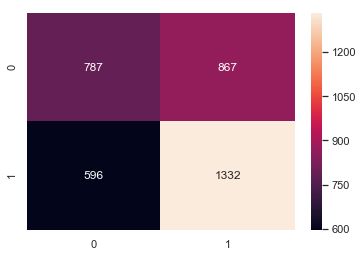

In [71]:
sns.heatmap(cm,annot=True,fmt='g')